In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

R = 8

In [0]:
def generate_x(omega, t, x0=0):
    x=x0+omega*t;
    x=x%(2*np.pi)
    return x

In [0]:
def sample_x(omega, Fs, tfinal):
    ts=np.arange(0,tfinal,1/Fs)
    ns=np.arange(0,Fs,1/tfinal)
    ns=ns.astype(int)
    xs = np.array([])
    for i in range(0,len(ts)):
        val = generate_x(omega,ts.item(i))
        xs = np.append(xs, val)
    
    return xs, ns

# Q1(a) 
### Plot the angle theta[n] w.r.t. n

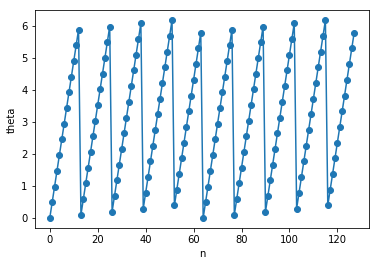

In [4]:
xs,ns = sample_x(2*np.pi*(R+2), 128, 1)
plt.plot(ns, xs, 'o-')
plt.xlabel('n')
plt.ylabel('theta')
plt.show()

# Q1(b) 
### Split the set of data samples (n,theta[n]) into (mutually exclusive and exhaustive) training set s_train: and test set s_test, randomly. The size of training set, |s_train| = 10. Plot the training samples (n,theta[n]); n ∈ s_train. Set np.random.seed(R+2), where R is defined above.

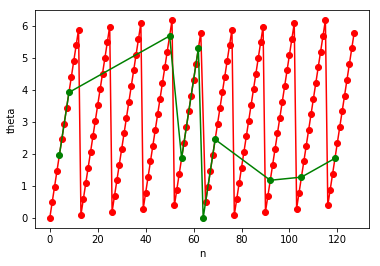

In [11]:
np.random.seed(R+2)
np.random.shuffle(ns)
x_shuffle=xs[ns]
train_size =10
n_train = ns[:train_size]
n_test = ns[train_size:]
s_train = x_shuffle[:train_size]
s_test = x_shuffle[train_size:]

def sortData(n,s):
    ind = np.argsort(n)
    return n[ind], s[ind]

n_train, s_train = sortData(n_train, s_train)
n_test, s_test = sortData(n_test, s_test)

plt.figure
plt.plot(n_test, s_test, '-or', n_train, s_train,'-og')
plt.xlabel('n')
plt.ylabel('theta')
plt.show()

# Q1(c) 
### Linear Regression Training LS

In [0]:
def getPhi(n, M):
    phi = [np.power(n,j) for j in range(M+1)]
    phi = np.array(phi).T
    return phi
if __name__=="__main__":
    getPhi([0,1,2,3],2) # testing

[-0.51 -0.48 -0.11 -0.07 -0.01 0.01 0.05 0.25 0.37 0.49]
[2.60 -14.75 30.77 41.45 -128.67 57.20]


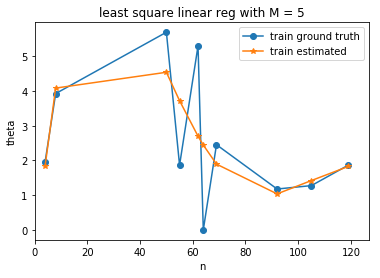

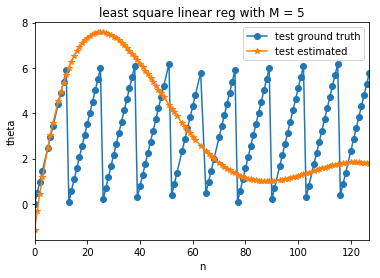

[3.36 -311.23 -1341.36 105874.07 607270.17 -3661595.56 -11093088.81
 27105314.95 73601620.12 -40284789.68 -157926691.08 -69756168.78]


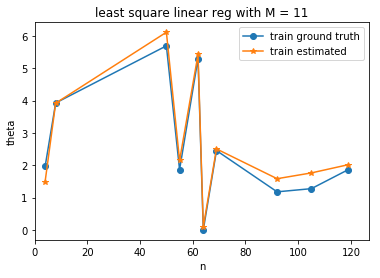

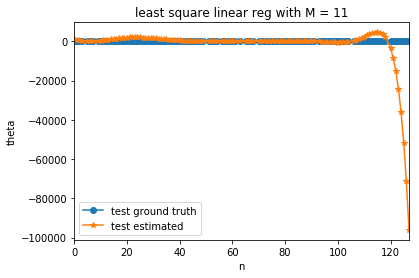

[2.82 -325.95 -711.50 105204.20 416172.35 -3709570.71 -1416165.78
 10002169.41 3840968.61 49725019.68 56049256.48 -238755205.03 -68249928.16
 615190981.55 837537951.61 1559550460.42 -7251204841.52 7059034604.55
 -58651127465.10 -70671507349.38 228161748100.64]


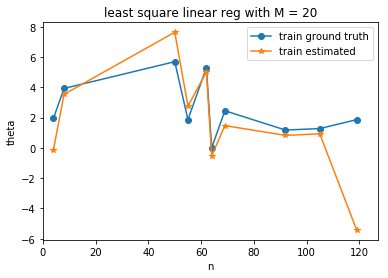

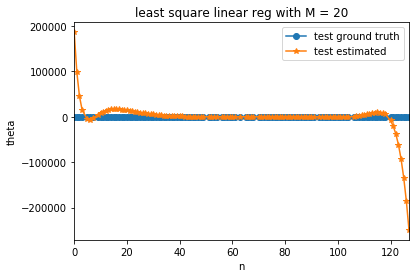

In [13]:
def linear_reg_train_ls(M,n,y):
    phi = getPhi(n, M)
#     phi_t = np.transpose(phi)
    W = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
#     w = np.dot(np.dot(np.linalg.inv(np.dot(phi_t, phi)), phi_t), y)
    return W


def predict(M,n,w):
    phi = getPhi(n, M)
    y = np.dot(phi, w)
    return y 

if __name__=="__main__":
    FLAG_norm = "meanByRange" # "byRange" "meanByRange"
    if FLAG_norm == "byRange":
        n_train_norm = n_train/128.
        n_test_norm = n_test/128.
    elif FLAG_norm == "meanByRange": # this gives better results
        n_train_norm = (n_train - n_train.mean())/(n_train.max()- n_train.min())
        n_test_norm =  (n_test - n_train.mean())/(n_train.max()- n_train.min())
    print(n_train_norm)

    M = [5,11,20]

    for i in range(len(M)):
        # TRAINING
        w  = linear_reg_train_ls(M[i], n_train_norm,s_train)
        print(w)
        y_train  = predict(M[i], n_train_norm, w)
        plt.figure
        plt.plot(n_train,s_train,'-o')
        plt.plot(n_train,y_train,'-*')
        plt.title('least square linear reg with M = ' + str(M[i]))
        plt.xlabel('n')
        plt.ylabel('theta')
        plt.xlim([0,127])
        legends = ['train ground truth', 'train estimated']
        plt.legend(legends)
        plt.show()

        # TESTING
        y_test   = predict(M[i], n_test_norm, w)
        plt.figure
        plt.plot(n_test, s_test, '-o')
        plt.plot(n_test, y_test, '-*')
        plt.title('least square linear reg with M = ' + str(M[i]))
        plt.xlabel('n')
        plt.ylabel('theta')
        plt.xlim([0,127])
        legends = ['test ground truth', 'test estimated']
        plt.legend(legends)
        plt.show()


# Q1(d) 

###Linear Regression Training GD

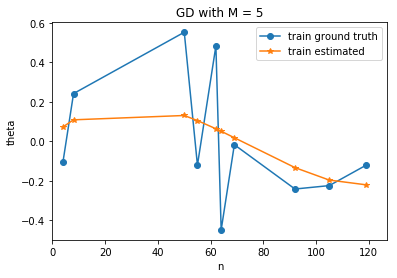

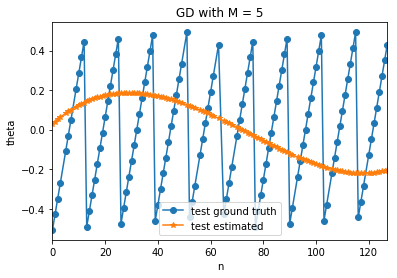

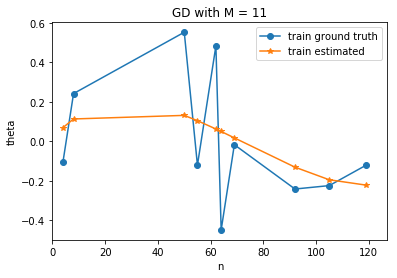

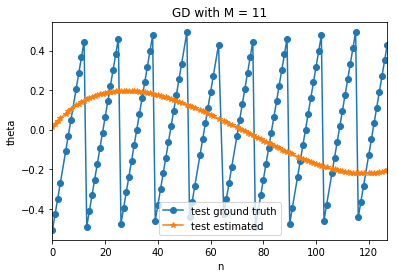

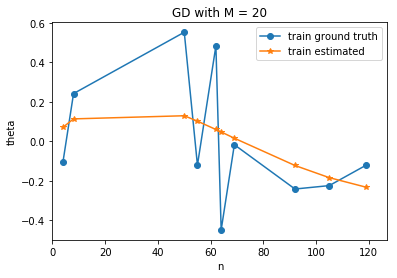

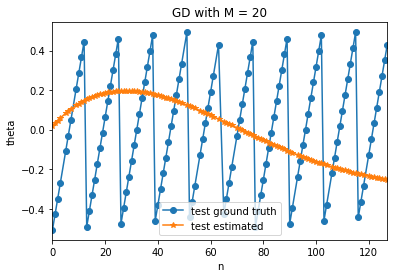

In [14]:
def initW(M):
    return 2*np.random.random(M+1)-1

def computeGradient(t, phi, w):
    return -phi.T.dot(t-phi.dot(w))

def getPhi(n, M):
    phi = [np.power(n,j) for j in range(M+1)]
    phi = np.array(phi).T
    return phi
    
def predict(M,n,w):
    phi = getPhi(n, M)
    y = np.dot(phi, w)
    return y 

def linear_reg_train_gd(n,t,M,Nepochs,lr):
    w = initW(M)
    for epoch in range(Nepochs):
        err = 0
        # forward pass
        y_est = predict(M, n, w)
        # update weights
        w = w - lr * computeGradient(t, getPhi(n,M), w)
#         print(w)
        err = err + np.sum(np.power(y_est-t,2))
        #print(err)
    return w 

if __name__=="__main__":
    n_epochs = 500
    lr = .15
    FLAG_norm = "meanByRange" # "byRange" "meanByRange"
    if FLAG_norm == "byRange":
        n_train_norm = n_train/128.
        n_test_norm = n_test/128.
    elif FLAG_norm == "meanByRange": # this gives better results
        n_train_norm = (n_train - n_train.mean())/(n_train.max()- n_train.min())
        n_test_norm =  (n_test - n_train.mean())/(n_train.max()- n_train.min())
    #print(n_train_norm)

    s_train = (s_train - s_train.mean())/(s_train.max()- s_train.min())
    s_test =  (s_test - s_test.mean())/(s_test.max()- s_test.min())

    M = [5,11,20]

    for i in range(len(M)):
        # TRAINING
        w  = linear_reg_train_gd(n_train_norm, s_train, M[i], n_epochs ,lr)
        y_train  = predict(M[i], n_train_norm, w)
        plt.figure
        plt.plot(n_train, s_train, '-o')
        plt.plot(n_train, y_train, '-*')
        plt.title('GD with M = ' + str(M[i]))
        plt.xlabel('n')
        plt.ylabel('theta')
        plt.xlim([0,127])
        legends = ['train ground truth', 'train estimated']
        plt.legend(legends)
        plt.show()

        # TESTING
        y_test = predict(M[i], n_test_norm, w)
        plt.figure
        plt.plot(n_test, s_test, '-o')
        plt.plot(n_test, y_test, '-*')
        plt.title('GD with M = ' + str(M[i]))
        plt.xlabel('n')
        plt.ylabel('theta')
        plt.xlim([0,127])
        legends = ['test ground truth', 'test estimated']
        plt.legend(legends)
        plt.show()


#Q1(d) 
###Linear Regression Training LASSO

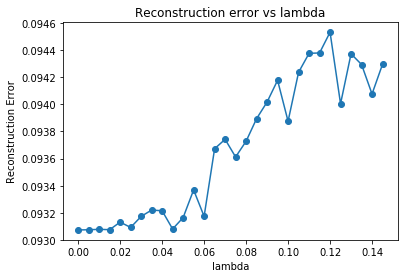

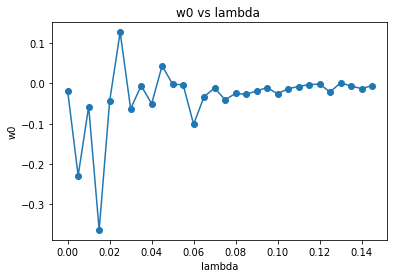

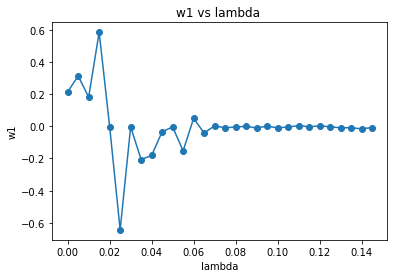

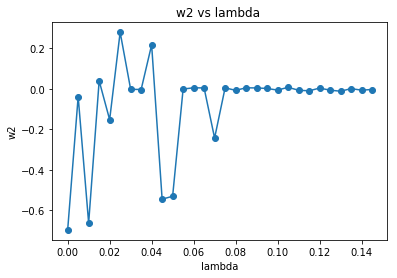

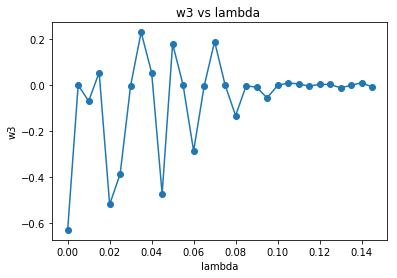

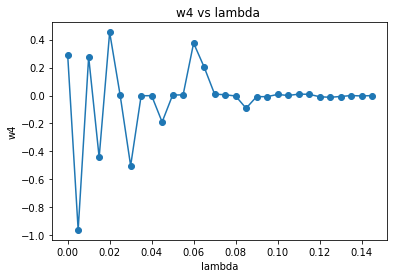

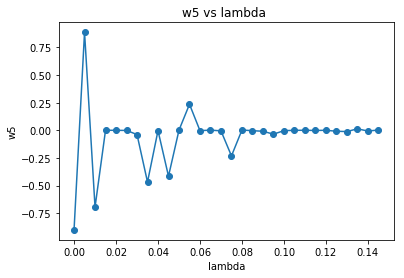

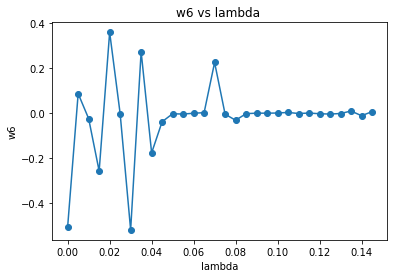

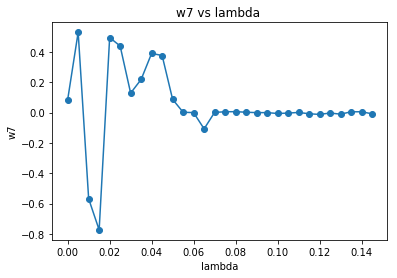

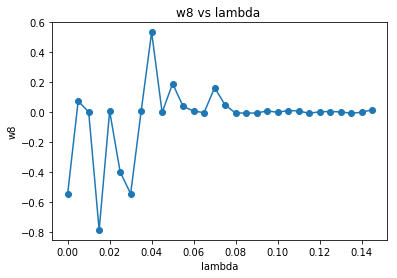

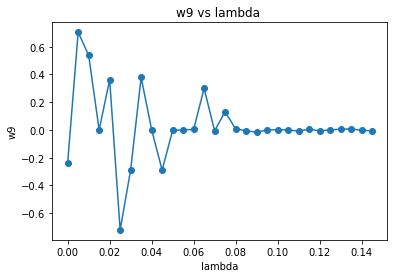

In [15]:
def linear_reg_train_gd_lasso(M,epochs,lmbda,lr,n,y):
 
    num_samples = len(n)

    w =  2*(np.random.random(M) - 0.5) # -1 to 1 random init
 
    for epoch in range(epochs):
        err = 0
        for i in range(num_samples):      
        # fwd pass
            y_est = 0
            for j in range(M):
                y_est = y_est + w[j] * np.power(n[i],j)
      
        # update weights
        for j in range(M):
            w[j] = w[j] - lr * ( (y_est-y[i]) * np.power(n[i],j) + lmbda * np.sign(w[j]))
      
        err = err + np.power(y_est-y[i],2)
    return w 


def linear_reg_test_gd_lasso(M,n,w):
    num_samples = len(n)

    y = np.zeros(num_samples)

    for i in range(num_samples):
        y_est = 0
        for j in range(M):
            y_est = y_est + w[j] * np.power(n[i],j)
    y[i] = y_est
 
    return y 

n_epochs = 100
lr = 0.1

n_train_norm = (n_train - n_train.mean())/(128)
n_test_norm =  (n_test - n_train.mean())/(128)

s_train_norm = (s_train - s_train.mean())/(s_train.max()- s_train.min())
s_test_norm =  (s_test - s_train.mean())/(s_train.max()- s_train.min())


lmbdas = np.arange(0,0.15,0.005);

M = 10
ws = np.zeros((M,len(lmbdas)))
errs = np.zeros(len(lmbdas))

for i in range(len(lmbdas)):
    w  = linear_reg_train_gd_lasso(M, n_epochs,lmbdas[i],lr, n_train_norm, s_train_norm)
    ws[:,i] = w
    y_train  = linear_reg_test_gd_lasso(M, n_train_norm,w)
    errs[i] = np.sum(np.power(s_train_norm-y_train,2)) / len(y_train)

plt.figure
plt.plot(lmbdas,errs,'-o')
plt.title('Reconstruction error vs lambda')
plt.xlabel('lambda')
plt.ylabel('Reconstruction Error')
plt.show()

for i in range(M):
    plt.figure
    plt.plot(lmbdas,ws[i,:],'-o')
    plt.title('w' +str(i)+' vs lambda ')
    plt.xlabel('lambda')
    plt.ylabel('w'+str(i))
    plt.show()

